In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [8]:
data[['Survived', 'Pclass']].value_counts()

Survived  Pclass
0         3         372
1         1         136
          3         119
0         2          97
1         2          87
0         1          80
Name: count, dtype: int64

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data_missing = data.isnull().sum()

<Axes: >

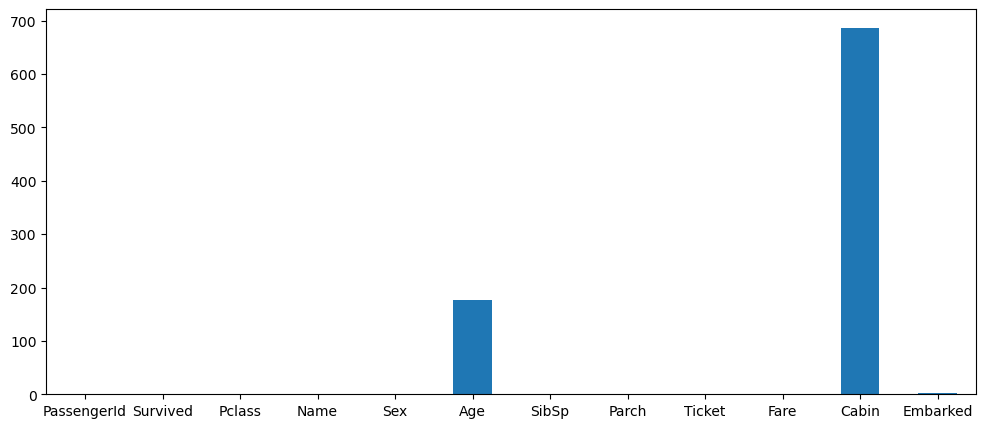

In [11]:
data_missing.plot.bar(figsize=(12,5), rot=0)

In [12]:
data.shape

(891, 12)

In [13]:
data = data.drop('Cabin', axis=1)

In [16]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [24]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [28]:
# convert Sex and Embarked to category
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

# After making the necessary changes, check the structure of the data again
print("\nDataset after Data Type Conversion:")
print(data.dtypes)


Dataset after Data Type Conversion:
PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [33]:
from sklearn.preprocessing import StandardScaler

# Reshaping the Fare data to be 2D
fare_data = data['Fare'].values.reshape(-1, 1)

# Applying StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(fare_data)

# Checking the mean of the standardized data
print("Mean of standardized data:", standardized_data.mean())

Mean of standardized data: 3.987332972840069e-18


In [34]:
import numpy as np

def standard_scaler(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    scaled_data = [(x - mean) / std_dev for x in data]
    return scaled_data

# Standardizing the 'Fare' column using custom scaler
scaled_fare = standard_scaler(data['Fare'])

# Checking the mean of the standardized data
print("Mean of standardized data (custom function):", np.mean(scaled_fare))

Mean of standardized data (custom function): -7.974665945680137e-18


In [35]:
from sklearn.preprocessing import MinMaxScaler

def minMaxScaler(data):
    min_val = min(data)
    max_val = max(data)
    scaled_data = [(x-min_val)/(max_val-min_val) for x in data]
    return scaled_data
    

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data['Fare'].values.reshape(-1, 1))
print(normalized_data)

[[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]
 [0.0165095 ]
 [0.10122886]
 [0.04113566]
 [0.02173075]
 [0.05869429]
 [0.03259623]
 [0.05182215]
 [0.01571255]
 [0.06104473]
 [0.01533038]
 [0.03122992]
 [0.05684821]
 [0.02537431]
 [0.03513366]
 [0.01410226]
 [0.05074862]
 [0.02537431]
 [0.01567195]
 [0.06929139]
 [0.04113566]
 [0.06126432]
 [0.01410226]
 [0.51334181]
 [0.01537917]
 [0.01541158]
 [0.0541074 ]
 [0.28598956]
 [0.01512699]
 [0.02049464]
 [0.16038672]
 [0.10149724]
 [0.01411046]
 [0.01571255]
 [0.03513366]
 [0.02194234]
 [0.01849397]
 [0.04098927]
 [0.01541158]
 [0.08115719]
 [0.01537917]
 [0.01571255]
 [0.03025399]
 [0.01512699]
 [0.04231498]
 [0.03474329]
 [0.07746484]
 [0.01522459]
 [0.14976542]
 [0.05074862]
 [0.12097534]
 [0.06929139]
 [0.02049464]
 [0.01411046]
 [0.05416439]
 [0.0915427 ]
 [0.01411046]
 [0.1561496 ]
 [0.16293235]
 [0.05445717]
 [0.0541074 ]
 [0.02975782]
 [0.02049464]
 [0.01592394]
 [0.01546857]
 [0.01690807]
 [0.02049464]
 [0.09